<a href="https://colab.research.google.com/github/archanagm296/amazon-project/blob/main/Amazon_dataset_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("/content/amazon.csv.zip")
df1 = df.copy()
df1.info()
df1.drop_duplicates(inplace=True)
df1['discounted_price'] = df1['discounted_price'].str.replace('₹','').str.replace(',','').astype(float)
df1['actual_price'] = df1['actual_price'].str.replace('₹','').str.replace(',','').astype(float)
df1['rating'] = pd.to_numeric(df1['rating'], errors='coerce')
df1['rating_count'] = df1['rating_count'].str.replace(',','')
df1['rating_count'] = pd.to_numeric(df1['rating_count'], errors='coerce')
df1.dropna(inplace=True)
df1.head()
# Remove % sign and convert to float
df1['discount_percentage'] = df1['discount_percentage'].str.replace('%', '', regex=False)
df1['discount_percentage'] = pd.to_numeric(df1['discount_percentage'], errors='coerce')

df1[['discounted_price', 'actual_price', 'rating', 'rating_count']].describe()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

,discounted_price,actual_price,rating,rating_count
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,3129.981826,5453.087743,4.096717,18307.376881
std,6950.548042,10884.467444,0.289497,42766.096572
min,39.000000,39.000000,2.000000,2.000000
25%,325.000000,800.000000,4.000000,1191.500000
50%,799.000000,1670.000000,4.100000,5179.000000
75%,1999.000000,4321.250000,4.300000,17342.250000
max,77990.000000,139900.000000,5.000000,426973.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

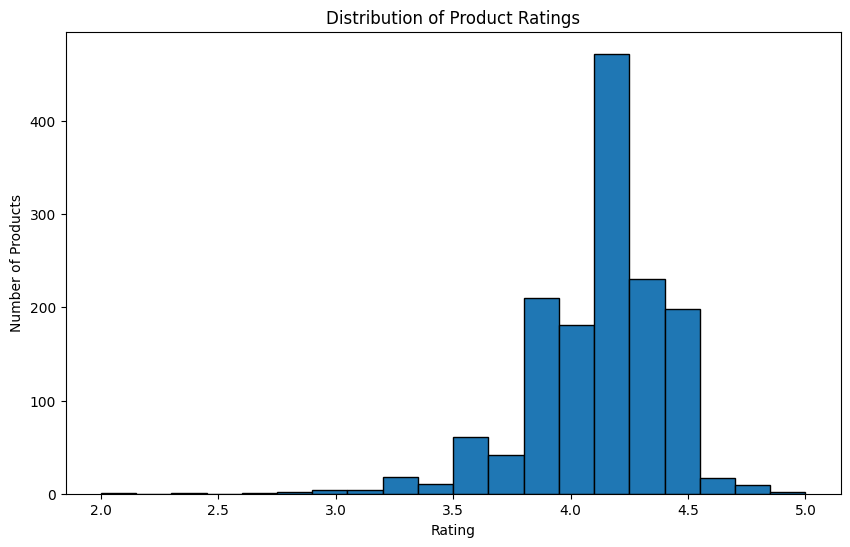

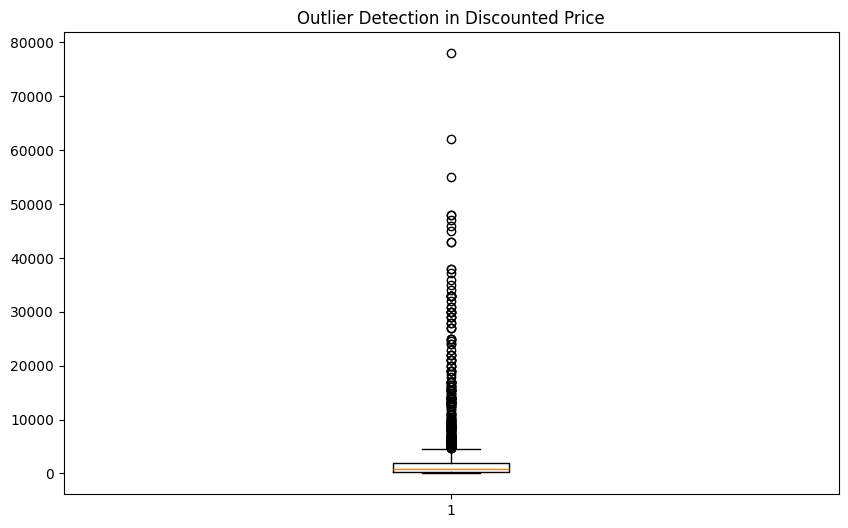

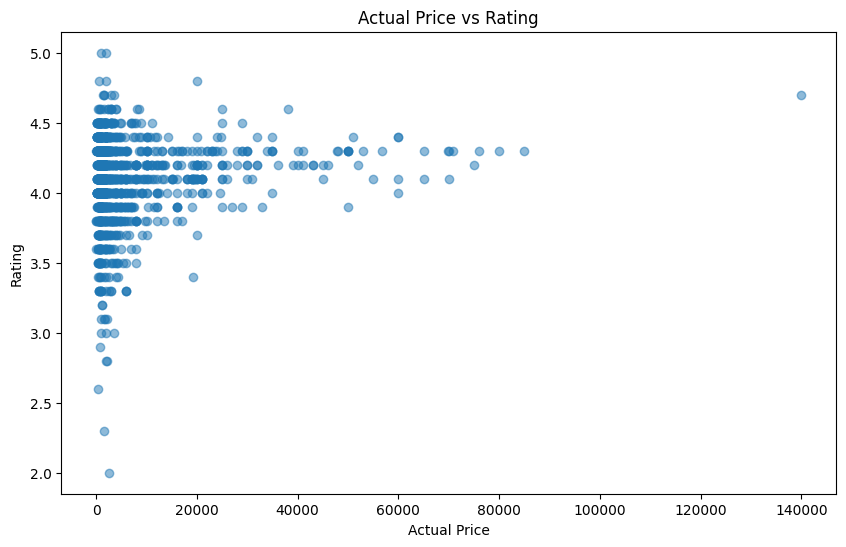

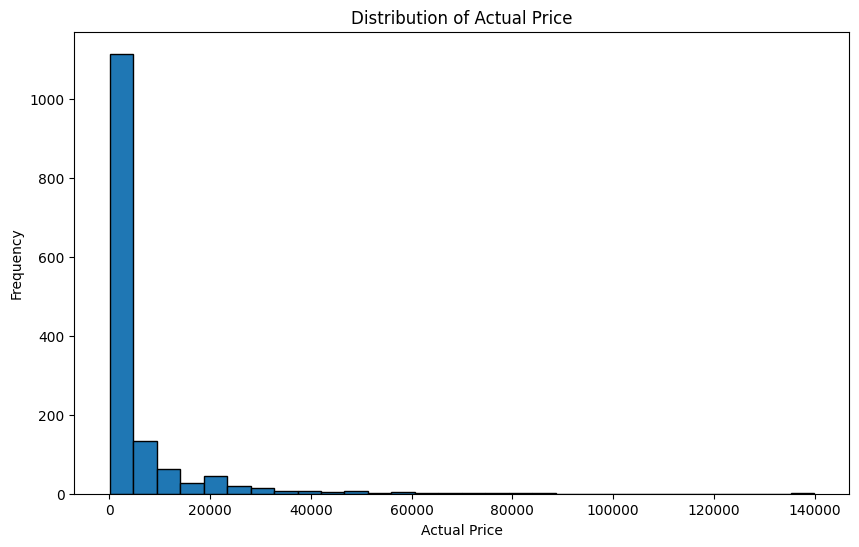

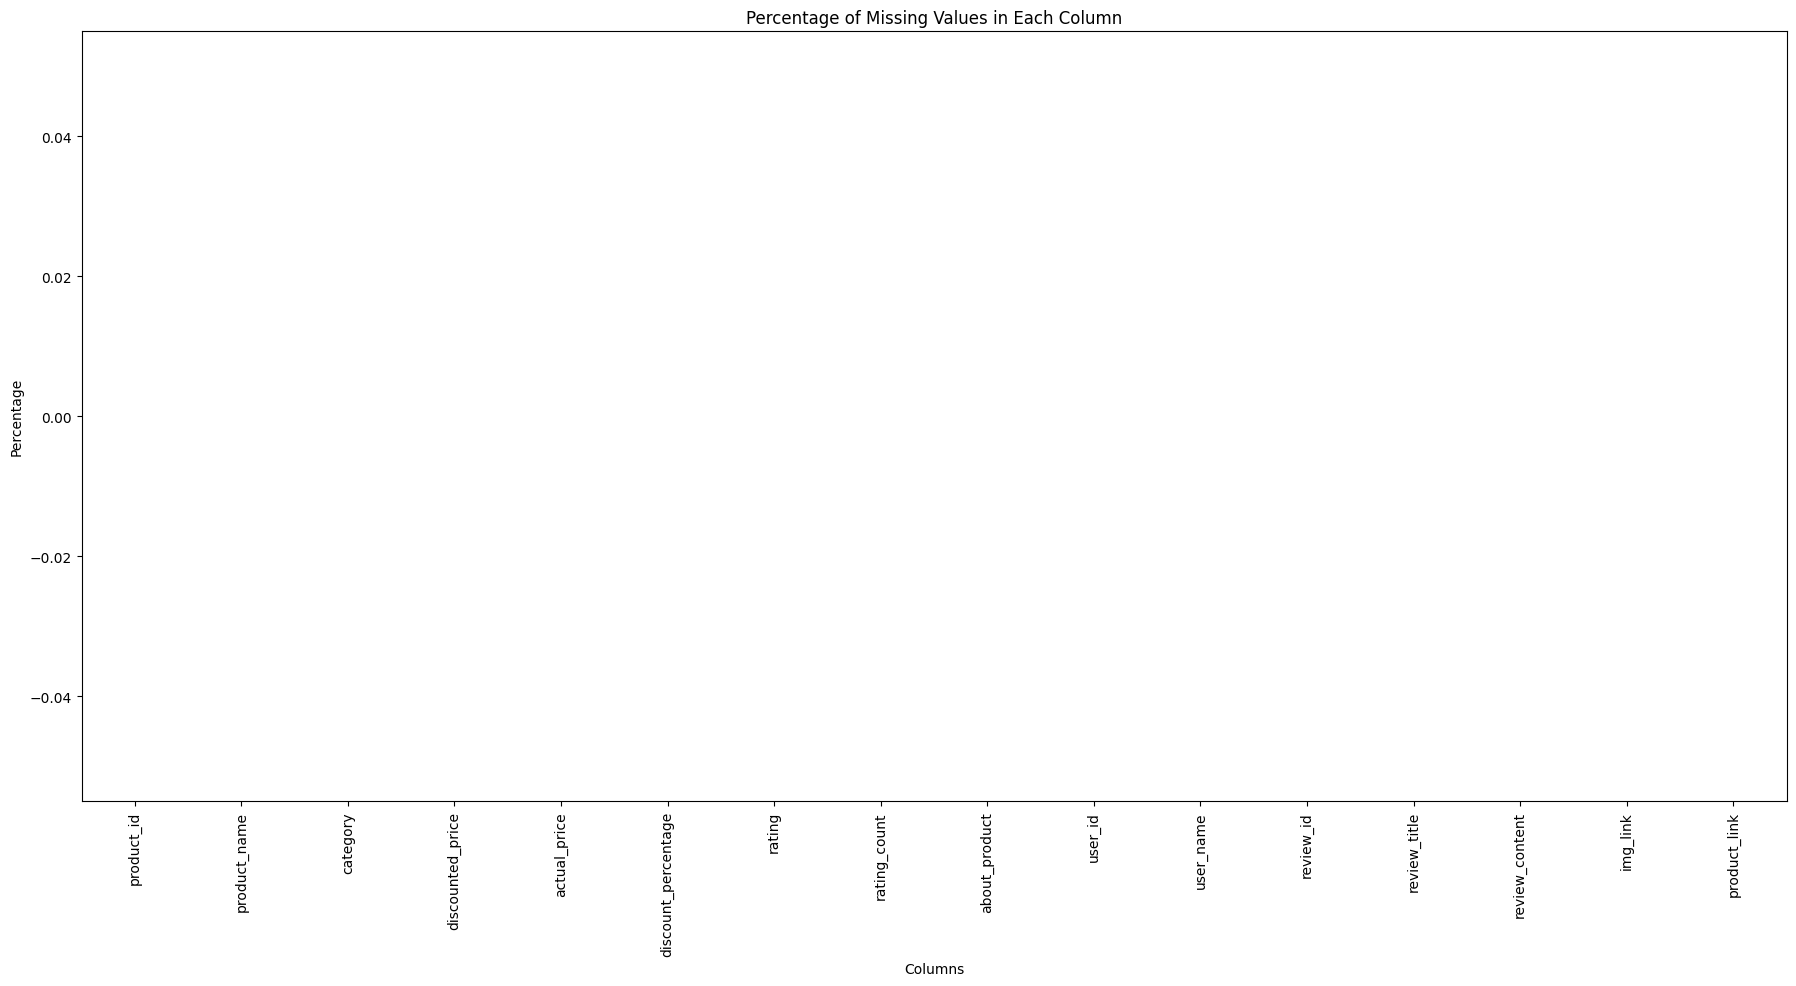

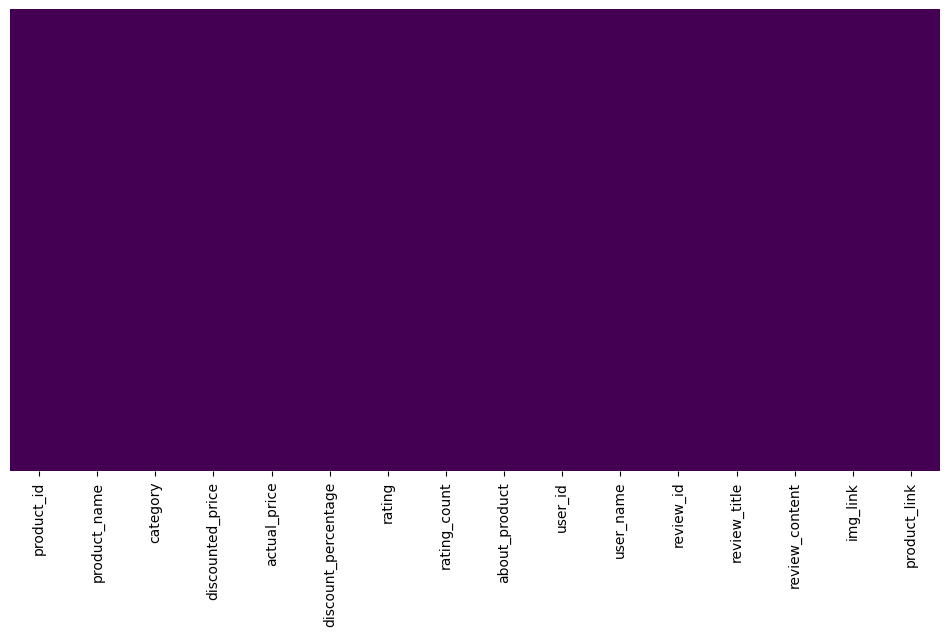

                     discount_percentage    rating  discounted_price  \
discount_percentage             1.000000 -0.154860         -0.241969   
rating                         -0.154860  1.000000          0.121181   
discounted_price               -0.241969  0.121181          1.000000   
actual_price                   -0.117494  0.122571          0.961906   

                     actual_price  
discount_percentage     -0.117494  
rating                   0.122571  
discounted_price         0.961906  
actual_price             1.000000  
Top 5 Categories by Average Rating:
 category
57    4.6
48    4.5
62    4.5
38    4.5
81    4.5
Name: rating, dtype: float64
Average rating per category:
 category
0      3.800000
1      4.150000
2      3.500000
3      3.600000
4      4.050000
         ...   
206    4.250000
207    4.150000
208    4.300000
209    4.133333
210    4.300000
Name: rating, Length: 211, dtype: float64


/tmp/ipython-input-327663323.py:102: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_products_by_category = df1.groupby('category').apply(lambda x: x.nlargest(3, 'rating_count'))


Top products by rating count per category:
                product_name  rating_count
category                                 
0        1157           913        1118.0
1        695           1333        4426.0
         742            540        1540.0
2        906            476        7222.0
3        748            514       14969.0
...                     ...           ...
208      858            818        2450.0
209      850            785        4308.0
         919            784        3686.0
         955            783        2493.0
210      924            376       15867.0

[449 rows x 2 columns]


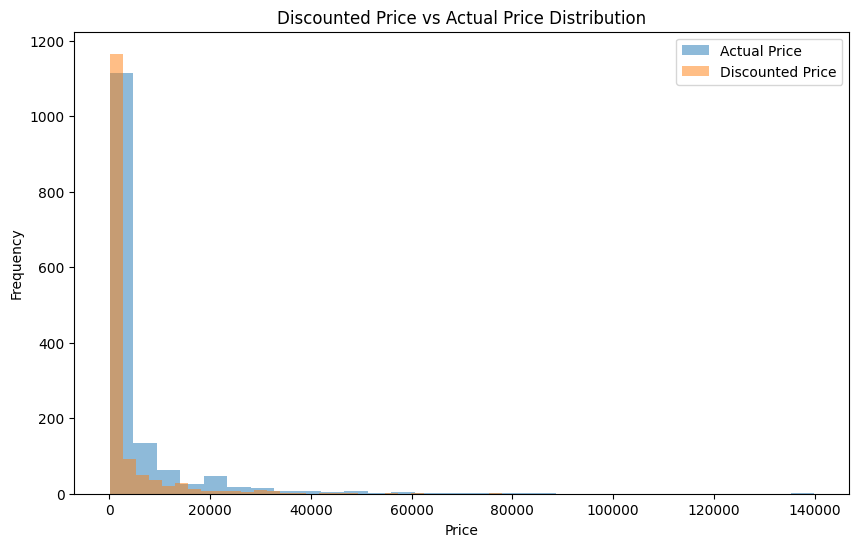

Average discount percentage per category:
 category
0      0.420
1      0.785
2      0.350
3      0.565
4      0.465
       ...  
206    0.000
207    0.050
208    0.175
209    0.130
210    0.000
Name: discount_percentage, Length: 211, dtype: float64
Most popular product names:
 product_name
383     5
385     4
1262    3
324     3
133     3
393     3
323     3
1245    3
1021    3
654     3
Name: count, dtype: int64
Most popular product keywords:
 about_product
1188    6
190     5
153     5
158     4
401     4
1010    4
1118    4
914     4
399     3
330     3
Name: count, dtype: int64
Most popular product reviews:
 review_content
332     8
269     7
412     7
1099    7
416     6
37      6
174     5
219     5
54      5
402     5
Name: count, dtype: int64
Correlation between discounted price and rating: 0.12118077051360486
Top 5 categories by rating:
 category
57    4.6
48    4.5
62    4.5
38    4.5
81    4.5
Name: rating, dtype: float64


In [29]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv("/content/amazon.csv.zip")

# Make a copy
df1 = df.copy()

# Check initial info
df1.info()

# Remove duplicates
df1.drop_duplicates(inplace=True)

# Clean price columns
df1['discounted_price'] = df1['discounted_price'].str.replace("₹",'').str.replace(",",'').astype('float64')
df1['actual_price'] = df1['actual_price'].str.replace("₹",'').str.replace(",",'').astype('float64')

# Clean discount_percentage
df1['discount_percentage'] = df1['discount_percentage'].str.replace('%','').astype('float64')
df1['discount_percentage'] = df1['discount_percentage'] / 100  # convert to fraction

# Handle unusual strings in rating column and convert to float
df1['rating'] = pd.to_numeric(df1['rating'].str.replace('|', '3.9'), errors='coerce')

# Clean rating_count column
df1['rating_count'] = pd.to_numeric(df1['rating_count'].str.replace(',', ''), errors='coerce')

# Drop missing values
df1.dropna(inplace=True)

# Descriptive statistics
print(df1[['discounted_price', 'actual_price', 'rating', 'rating_count']].describe())

# Visualizations
plt.figure(figsize=(10,6))
plt.hist(df1['rating'], bins=20, edgecolor='blue')
plt.title("Distribution of Product Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Products")
plt.show()

plt.figure(figsize=(10,6))
plt.boxplot(df1['discounted_price'])
plt.title("Outlier Detection in Discounted Price")
plt.show()

plt.figure(figsize=(10,6))
plt.scatter(df1['actual_price'], df1['rating'], alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Rating')
plt.title('Actual Price vs Rating')
plt.show()

plt.figure(figsize=(10,6))
plt.bar(df1['actual_price'], bins=30, edgecolor='black')
plt.title('Distribution of Actual Price')
plt.xlabel('Actual Price')
plt.ylabel('Frequency')
plt.show()

# Missing values visualization
plt.figure(figsize=(22, 10))
missing_percentage = df1.isnull().sum() / len(df1) * 100
missing_percentage.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Percentage of Missing Values in Each Column')
plt.show()

plt.figure(figsize=(12,6))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Correlation
print(df1[['discount_percentage', 'rating', 'discounted_price', 'actual_price']].corr())

# Encode categorical columns
categorical_cols = ['product_id', 'product_name', 'category', 'about_product',
                    'user_id', 'user_name', 'review_id', 'review_title',
                    'review_content', 'img_link', 'product_link']

le = LabelEncoder()
for col in categorical_cols:
    df1[col] = le.fit_transform(df1[col])

# Top 5 categories by mean rating
top_categories = df1.groupby('category')['rating'].mean().sort_values(ascending=False).head()
print("Top 5 Categories by Average Rating:\n", top_categories)

# Questions Analysis

# Q1: Average rating per category
avg_rating_category = df1.groupby('category')['rating'].mean()
print("Average rating per category:\n", avg_rating_category)

# Q2: Top rating_count products by category
top_products_by_category = df1.groupby('category').apply(lambda x: x.nlargest(3, 'rating_count'))
print("Top products by rating count per category:\n", top_products_by_category[['product_name', 'rating_count']])

# Q3: Distribution of discounted vs actual price
plt.figure(figsize=(10,6))
plt.hist(df1['actual_price'], alpha=0.5, label='Actual Price', bins=30)
plt.hist(df1['discounted_price'], alpha=0.5, label='Discounted Price', bins=30)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Discounted Price vs Actual Price Distribution')
plt.legend()
plt.show()

# Q4: Average discount percentage by category
avg_discount_category = df1.groupby('category')['discount_percentage'].mean()
print("Average discount percentage per category:\n", avg_discount_category)

# Q5: Most popular product names
top_products = df1['product_name'].value_counts().head(10)
print("Most popular product names:\n", top_products)

# Q6: Most frequent product keywords
# Assuming 'about_product' column has keywords
top_keywords = df1['about_product'].value_counts().head(10)
print("Most popular product keywords:\n", top_keywords)

# Q7: Most popular product reviews
top_reviews = df1['review_content'].value_counts().head(10)
print("Most popular product reviews:\n", top_reviews)

# Q8: Correlation between discounted_price and rating
corr_price_rating = df1['discounted_price'].corr(df1['rating'])
print("Correlation between discounted price and rating:", corr_price_rating)

# Q9: Top 5 categories by highest ratings
top5_categories = df1.groupby('category')['rating'].mean().sort_values(ascending=False).head(5)
print("Top 5 categories by rating:\n", top5_categories)


In [30]:
import pandas as pd
print("Original 'rating' column dtype:", df["rating"].dtype)
if df["rating"].dtype == "object":
    df["rating"] = pd.to_numeric(df["rating"], errors="coerce")
df = df.dropna(subset=['rating'])
average_ratings = df.groupby("category")["rating"].mean().reset_index()
average_ratings = average_ratings.sort_values(by="rating", ascending=False)
print("Average ratings per category:\n", average_ratings)


Original 'rating' column dtype: object
Average ratings per category:
                                               category  rating
57                       Computers&Accessories|Tablets     4.6
48   Computers&Accessories|NetworkingDevices|Networ...     4.5
62    Electronics|Cameras&Photography|Accessories|Film     4.5
38             Computers&Accessories|Components|Memory     4.5
81   Electronics|HomeAudio|MediaStreamingDevices|St...     4.5
..                                                 ...     ...
3    Computers&Accessories|Accessories&Peripherals|...     3.6
88   Electronics|HomeTheater,TV&Video|Accessories|3...     3.5
2    Computers&Accessories|Accessories&Peripherals|...     3.5
14   Computers&Accessories|Accessories&Peripherals|...     3.4
146  Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea...     3.3

[211 rows x 2 columns]


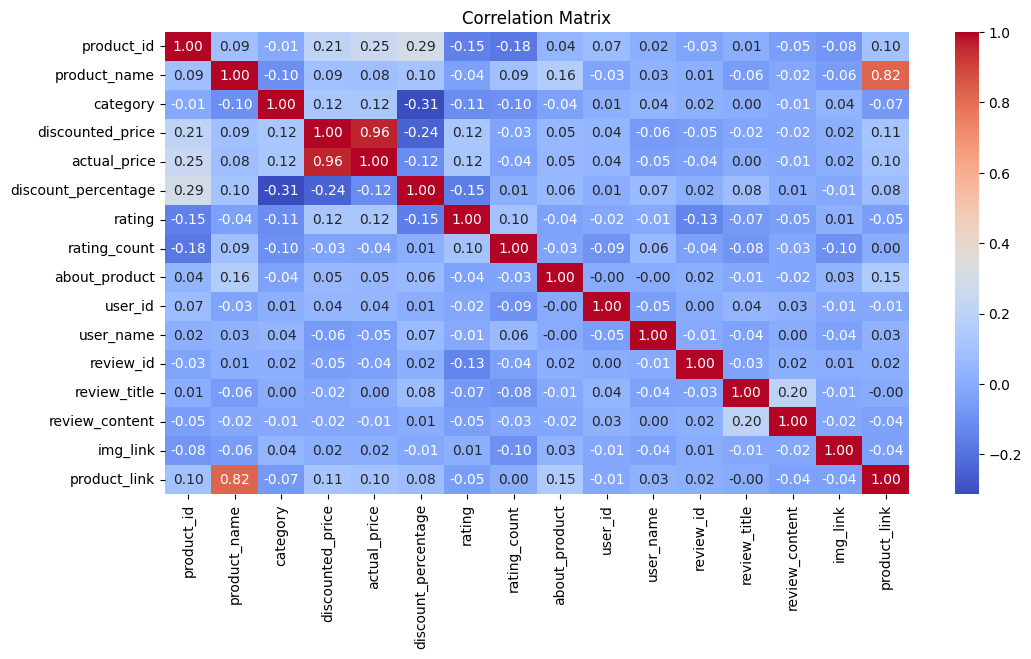

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df1.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr_matrix,annot=True,fmt=".2f",cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

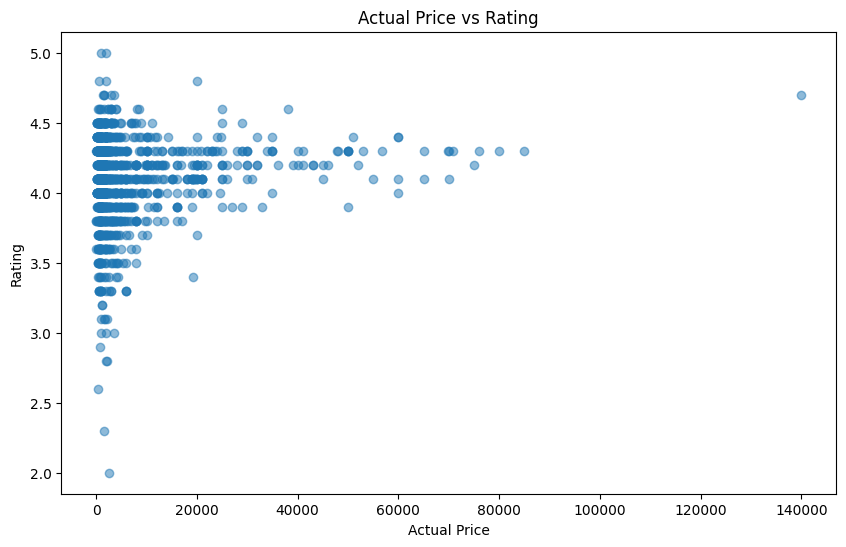

In [36]:
plt.figure(figsize=(10,6))
plt.scatter(df1['actual_price'], df1['rating'], alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Rating')
plt.title('Actual Price vs Rating')
plt.show()

category
0      0.420
1      0.785
2      0.350
3      0.565
4      0.465
       ...  
206    0.000
207    0.050
208    0.175
209    0.130
210    0.000
Name: discount_percentage, Length: 211, dtype: float64


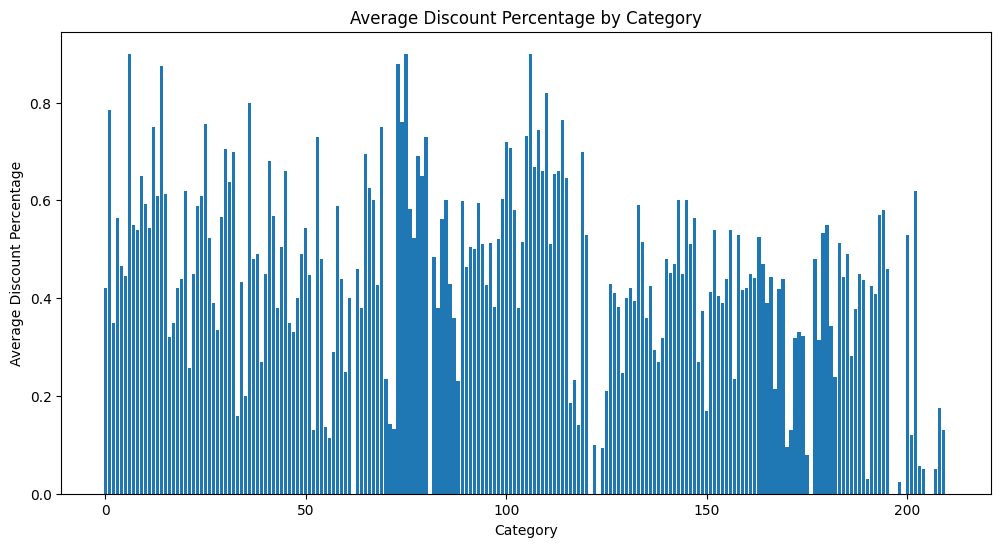

In [38]:
import matplotlib.pyplot as plt

# Average discount per category
avg_discount_per_category = df1.groupby('category')['discount_percentage'].mean()

# Display values
print(avg_discount_per_category)

# Bar plot
plt.figure(figsize=(12,6))
plt.bar(avg_discount_per_category.index, avg_discount_per_category.values)
plt.xlabel("Category")
plt.ylabel("Average Discount Percentage")
plt.title("Average Discount Percentage by Category")
plt.show()

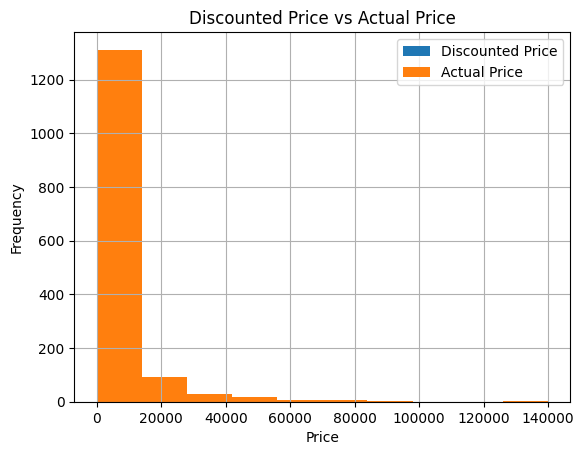

In [40]:
import matplotlib.pyplot as plt

# Histogram for discounted and actual price
df1['discounted_price'].hist(label='Discounted Price')
df1['actual_price'].hist(label='Actual Price')
plt.legend()
plt.title("Discounted Price vs Actual Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Calculate discount percentage
df1['discount_percentage'] = (
    (df1['actual_price'] - df1['discounted_price']) / df1['actual_price']
) * 100

In [45]:
# Import required libraries
import pandas as pd
from textblob import TextBlob

# Step 1: Ensure review_content is string
df1['review_content'] = df1['review_content'].astype(str)

# Step 2: Apply sentiment analysis using TextBlob
df1['sentiment'] = df1['review_content'].apply(
    lambda x: TextBlob(x).sentiment.polarity
)

# Step 3: Sort reviews by sentiment score
# Most positive reviews
positive_reviews = df1.sort_values(by='sentiment', ascending=False)

# Most negative reviews
negative_reviews = df1.sort_values(by='sentiment', ascending=True)

# Step 4: Display top 10 positive and negative reviews
top_positive = positive_reviews[['product_id', 'user_id', 'review_content', 'sentiment']].head(10)
top_negative = negative_reviews[['product_id', 'user_id', 'review_content', 'sentiment']].head(10)

print("Top 10 Positive Reviews:")
print(top_positive)

print("\nTop 10 Negative Reviews:")
print(top_negative)

Top 10 Positive Reviews:
      product_id                                            user_id  \
302   B016MDK4F4  AG6BJSKUOVW6DOSEHJ6OLIDCO5MA,AHW46EWYPFF2DEN5K...   
1309  B0BPJBTB3F  AGHT3K4KSG5MAQUSXRDT5VNB73GA,AE4Q5XQ7SZW35EEUJ...   
872   B09NNHFSSF  AEJ4BLDMPXCI2I6X5JEA52RDVWJA,AH522PPGKMDYNI7VJ...   
1352  B07TXCY3YK  AFDMLUXC5LS5RXDJSJJRHNBURIVQ,AHFY5XAN2X4N5GXOJ...   
987   B07KNM95JK  AE2XMB6CEF4SCPYQI75GHNYEAXIA,AGGZZQ5IGA5QAIGYO...   
134   B082T6GVG9  AH4BURHCF5UQFZR4VJQXBEQCTYVQ,AGSJLPK6HU2FB4HII...   
625   B08ZJDWTJ1  AFWREBMJRX47V7TJD5E7VUBKZY3Q,AFKUWB5DABB7DVVRN...   
750   B00ZRBWPA0  AGY65IJP7XREWO3GUDT46474CYKA,AGU43SQ6PXZIL5F5R...   
934   B0BG62HMDJ  AECMQ2RLIJLZPBV65R74ZXYWBHDA,AEDKV6ZUXIBYYQJBX...   
724   B003L62T7W  AE6DY6YWTSSE3XNHDXZDGQM2JL2Q,AES3UPSNCD37JZLHZ...   

                                         review_content  sentiment  
302   Ok,Quality perfect , perfect 5m, must buy,Ok,E...   1.000000  
1309  The heating capacity is zero .Moreover i have ...